# Laboratorium 2: ewaluacja metod uczenia maszynowego

W ramach laboratorium omówiona zostanie ewaluacja metod uczenia maszynowego ze szczególnym uwzględnieniem problemu regresji.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

boston = datasets.load_boston()
print(boston.DESCR)

print("boston (shape): ", boston.data.shape)

print(boston.target)

# Wycinamy kawałek danych do testów:

X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.2, random_state=421, shuffle=True)

print(X_train.shape)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Regresja liniowa

Przejrzyj poniższy kod.
Policz współczynniki $R^2$ na zbiorze testowym i treningowym.
Jak się je interpretuje? Który powinien być większy?
Policz też błędy średniokwadratowe.

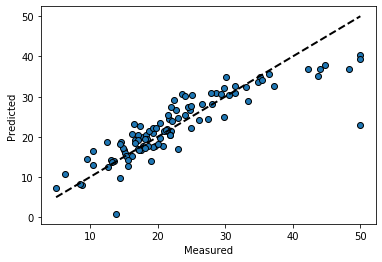

MSE train:  21.90770659378019
MSE test:   22.551766026879463
R2 train:  0.7334972975111718
R2 test:   0.757788161119954


In [20]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

def evaluate_reg(reg):
  pred_test = reg.predict(X_test)
  pred_train = reg.predict(X_train)

  fig, ax = plt.subplots()
  ax.scatter(y_test, pred_test, edgecolors=(0, 0, 0))
  ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
  ax.set_xlabel('Measured')
  ax.set_ylabel('Predicted')
  plt.show()

  print("MSE train: ", mean_squared_error(y_train, pred_train))
  print("MSE test:  ", mean_squared_error(y_test, pred_test)) 

evaluate_reg(lr)

print("R2 train: ", lr.score(X_train, y_train))
print("R2 test:  ", lr.score(X_test, y_test)) 


## Ridge regression

Przeprowadź analogiczną procedurę jak w poprzednim punkcie, ale z wykorzystaniem *Ridge regression*.
Sprawdź, które współczynniki regresji są równe zero. Co to oznacza? Jakim parametrom w danych odpowiadają te cechy?

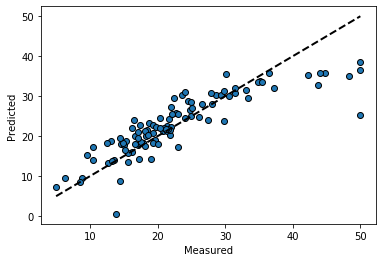

MSE train:  24.25107020623269
MSE test:   25.30663518784276
Params:  [-0.04978535  0.03992148 -0.01018163  0.         -0.          2.48781338
  0.00788664 -0.79666863  0.21500793 -0.01328535 -0.82312589  0.00910398
 -0.6461811 ]
Intercept:  32.74547531916389
R2 train:  0.704990765667721
R2 test:   0.728200149052272


In [35]:
from sklearn import linear_model

reg_ridge = linear_model.Ridge(alpha=1)
reg_lasso = linear_model.Lasso(alpha=0.5)

reg = reg_lasso

reg.fit(X_train, y_train)
evaluate_reg(reg)
print("Params: ", reg.coef_) # TODO
print("Intercept: ", reg.intercept_) # TODO

## solution 
print("R2 train: ", reg.score(X_train, y_train))
print("R2 test:  ", reg.score(X_test, y_test)) # TODO

## Drzewa regresji

Dopasuj kilkukrotnie model drzewa regresji. W jakim zakresie zmienia się błąd na zbiorze treningowym?

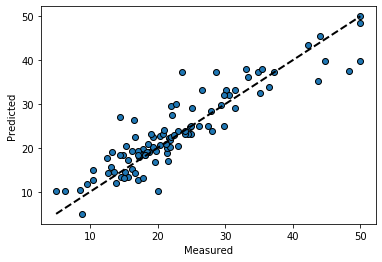

MSE train:  0.0
MSE test:   16.877745098039213


In [50]:
from sklearn import tree


reg = tree.DecisionTreeRegressor()
reg.fit(X_train, y_train)
        
evaluate_reg(reg)

## Walidacja krzyżowa

Zaobserwuj stabilność średniej z MSE przy wykorzystaniu walidacji krzyżowej.
Dopisz sprawdzanie błędów poszczególnych klasyfikatorów na zbiorze testowym (normalnie tego się **nie** robi -- to jest tylko dla celów poglądowych). Zastanów się skąd może brać się różnica.

Porównaj wyniki dla drzew regresji i metody Lasso z wcześniejszego zadania.

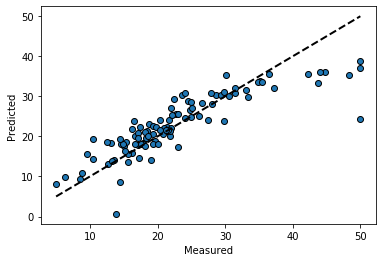

MSE train:  24.017014032010717
MSE test:   25.241109075121713
trening:
24.464516198321743
walidacja:
24.33355942685899
testowy:
25.5516370628402


In [93]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)
trening = []
walidacja = []
testowy = []
for train_idx, valid_idx in kf.split(X_train):
  X_t_f, X_v_f = X_train[train_idx], X_train[valid_idx]
  y_t_f, y_v_f = y_train[train_idx], y_train[valid_idx]
  pred_train = reg.predict(X_t_f)
  pred_valid = reg.predict(X_v_f)
  pred_test = reg.predict(X_test)
  #reg = tree.DecisionTreeRegressor()
  reg = linear_model.Lasso(alpha=0.5)
  reg.fit(X_t_f, y_t_f)
  trening.append(mean_squared_error(y_t_f, pred_train))
  walidacja.append(mean_squared_error(y_v_f, pred_valid))
  testowy.append(mean_squared_error(y_test,pred_test))

evaluate_reg(reg)
#pred_train = reg.predict(X_t_f)
#pred_valid = reg.predict(X_v_f)
#pred_test = reg.predict(X_test)
# wypisz średnie wartości MSE na zbiorach:
# X_t_f (trening),

suma=0
suma_w=0
suma_t=0
for i in range (len(trening)):
  suma= suma+trening[i]
  suma_w = suma_w+walidacja[i]
  suma_t= suma_t+testowy[i]
trening1= suma/len(trening)
walidacja1= suma_w/len(walidacja)
testowy1= suma_t/len(testowy)
print("trening:" )
print(trening1)
# X_v_f (walidacja),
print("walidacja:")
print(walidacja1)
# X_test (testowy)
print("testowy:")
print(testowy1)

## Optymalizacja parametrów

Z użyciem walidacji krzyżowej

Znajdź optymalną wartość parametru `alpha` dla metody Lasso.

Następnie znajdź optymalne parametry dla metody `DecisionTreeRegressor` (na przykład `max_depth`, `min_samples_leaf`). Spróbuj zmodyfikować także inne parametry i sprawdź rezultaty.

Napisz własną funkcję oceniającą model regresji tak, aby premiowała małe drzewa. Ile minimum węzłów w drzewie potrzebujesz aby MSE na zbiorze testowym było mniejsze niż 15?

In [76]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.1, 0.5 , 1.0, 5.0, 10.0]}
lasso_reg = linear_model.Lasso()
gcv_reg = GridSearchCV(lasso_reg, parameters, scoring='neg_mean_squared_error')
gcv_reg.fit(X_train, y_train)
print(gcv_reg.best_params_)

print("MSE train: ", 0) # TODO
print("MSE test:  ", 0) # TODO

grid_tree = {} # TODO
tree_reg = tree.DecisionTreeRegressor()
gcv_reg = 0 # TODO
gcv_reg.fit(X_train, y_train)
print(gcv_reg.best_params_)

tree.plot_tree(gcv_reg.best_estimator_)

print("MSE train: ", 0) # TODO
print("MSE test:  ", 0) # TODO
print("Number of nodes: ", gcv_reg.best_estimator_.tree_.node_count)

{'alpha': 0.1}
MSE train:  0
MSE test:   0


AttributeError: ignored